In [1]:
import menpo.io as mio
import os
from menpowidgets import visualize_images
import matplotlib.pyplot as plt
from menpo.transform import ThinPlateSplines, PiecewiseAffine
#Find working directory

global working_dir 
working_dir = mio.data_dir_path()
print( working_dir )

image_files = working_dir / '*'
print( image_files )

os.listdir( str( working_dir ) )



/Users/Lee/Desktop/Menpo_Playground_With_Mynotes/menpo_playground/src/lib/python3.5/site-packages/menpo/data
/Users/Lee/Desktop/Menpo_Playground_With_Mynotes/menpo_playground/src/lib/python3.5/site-packages/menpo/data/*


['breakingbad.pts',
 'tongue.jpg',
 'lenna.ljson',
 'takeo.ppm',
 'einstein.jpg',
 'lenna.png',
 'einstein.pts',
 'menpo_thumbnail.jpg',
 'breakingbad.jpg',
 'tongue.pts',
 'takeo.pts']

In [2]:
lazy_images = mio.import_images( image_files )
print( "The working directory contains: {} files".format( len( lazy_images ) ) )

The working directory contains: 6 files


In [3]:
images = []
for image in os.listdir( str( working_dir ) ):
   if image.startswith( "lenna.png" ) or image.startswith( "takeo.ppm" ):
    print( image )
    images.append( mio.import_image( working_dir / image ) )


takeo.ppm
lenna.png


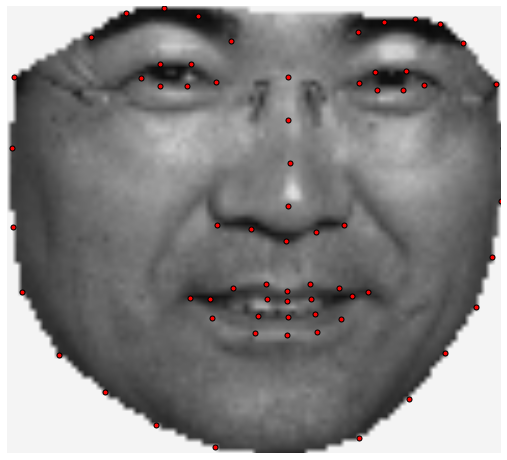

In [4]:
%matplotlib inline

def crop_image(image):
    return image.as_masked().crop_to_landmarks().constrain_mask_to_landmarks()

images = list( map( crop_image, images ) )

visualize_images( images )

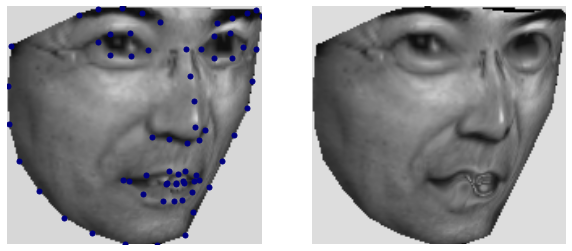

In [5]:
tps_lenna_to_takeo = ThinPlateSplines( images[ 1 ].landmarks['LJSON'].lms, images[ 0 ].landmarks['PTS'].lms )
pwa_lenna_to_takeo = PiecewiseAffine( images[ 1 ].landmarks['LJSON'].lms, images[ 0 ].landmarks['PTS'].lms )

tps_takeo_to_lenna = ThinPlateSplines( images[ 0 ].landmarks['PTS'].lms, images[ 1 ].landmarks['LJSON'].lms )
pwa_takeo_to_lenna = PiecewiseAffine( images[ 0 ].landmarks['PTS'].lms, images[ 1 ].landmarks['LJSON'].lms )



warped_takeo_to_lenna_pwa = images[ 0 ].as_unmasked(copy=False).warp_to_mask(images[ 1 ].mask, pwa_lenna_to_takeo)
warped_takeo_to_lenna_tps = images[ 0 ].as_unmasked(copy=False).warp_to_mask(images[ 1 ].mask, tps_lenna_to_takeo)
plt.subplot( 121 )
warped_takeo_to_lenna_pwa.view_landmarks();
plt.subplot( 122 )
warped_takeo_to_lenna_tps.view_landmarks();

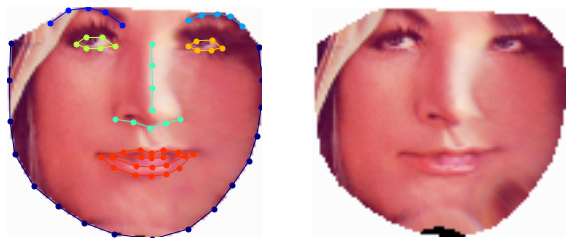

In [6]:
warped_lenna_to_takeo_pwa = images[ 1 ].as_unmasked( copy = False ).warp_to_mask( images[ 0 ].mask, pwa_takeo_to_lenna)
warped_lenna_to_takeo_tps = images[ 1 ].as_unmasked( copy = False ).warp_to_mask( images[ 0 ].mask, tps_takeo_to_lenna)

plt.subplot( 121 )
warped_lenna_to_takeo_pwa.view_landmarks();
plt.subplot( 122 )
warped_lenna_to_takeo_tps.view();


# warped_lenna_to_takeo_pwa = images[ 1 ].as_unmasked(copy=False).warp_to_mask(images[ 0 ].mask, pwa_takeo_to_lenna)
# warped_lenna_to_takeo_tps = images[ 1 ].as_unmasked(copy=False).warp_to_mask(images[ 0 ].mask, tps_takeo_to_lenna)
# plt.subplot( 121 )
# warped_lenna_to_takeo_pwa.view_landmarks();
# plt.subplot( 122 )
# warped_lenna_to_takeo_tps.view();